# <b>DATA ANALYSIS : 
> COVID-19 Cases and Vaccination Analysis in India

## <b> Objective:
>  The objective of this project is to analyze and visualize the COVID-19 situation and vaccination progress in India by exploring two datasets. The project aims to gain insights into the number of COVID-19 cases, active cases, recoveries, deaths, recovery rate, mortality rate, and vaccination progress by state. The project also aims to create visualizations that will help understand the growth trends of COVID-19 cases and vaccination progress in India.

In [1]:
# Importing Libraries:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
from datetime import datetime
%matplotlib inline

import warnings 
warnings.filterwarnings('ignore')

In [29]:
# LOADING THE DATASETS :
df_india = pd.read_csv('Dataset/covid_19_india.csv')                # Importing Dataset having info about the Covid-19 Cases for every state of INDIA.
df_vaccine = pd.read_csv('Dataset/covid_vaccine_statewise.csv')     # Importing DAtaset having info about the Vaccination for the patients statewise.

print (f'''
df_india Dataframe      =>  Rows : {df_india.shape[0]} , Columns :  {df_india.shape[1]}
df_vaccine Dataframe    =>  Rows : {df_vaccine.shape[0]} , Columns :  {df_vaccine.shape[1]}
''')
display(df_india.head(), df_vaccine.head())


df_india Dataframe      =>  Rows : 18110 , Columns :  9
df_vaccine Dataframe    =>  Rows : 7845 , Columns :  24



,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


,Updated On,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0


## <b> Pre-Processing and EDA (Exploratory Data Analysis) on the Datasets:

### <b> DATASET : df_india (info about Covid 19 Cases.)

In [3]:
# Droping un-necessary columns from the dataset.
df_india.drop(['Sno', 'Time','ConfirmedIndianNational','ConfirmedForeignNational'], axis =1, inplace= True)
df_india.head()


,Date,State/UnionTerritory,Cured,Deaths,Confirmed
0,2020-01-30,Kerala,0,0,1
1,2020-01-31,Kerala,0,0,1
2,2020-02-01,Kerala,0,0,2
3,2020-02-02,Kerala,0,0,3
4,2020-02-03,Kerala,0,0,3


In [4]:
# Getting the number of ACTIVE cases:
# active_cases = confirmed_cases - [Cured_cases + Deaths]

df_india['Active'] = df_india['Confirmed'] - (df_india['Cured'] + df_india['Deaths'])
df_india.tail(n = 5)

,Date,State/UnionTerritory,Cured,Deaths,Confirmed,Active
18105,2021-08-11,Telangana,638410,3831,650353,8112
18106,2021-08-11,Tripura,77811,773,80660,2076
18107,2021-08-11,Uttarakhand,334650,7368,342462,444
18108,2021-08-11,Uttar Pradesh,1685492,22775,1708812,545
18109,2021-08-11,West Bengal,1506532,18252,1534999,10215


In [21]:
# Statewise Data for the COVID Cases.

state_wise = df_india[['State/UnionTerritory', 'Cured','Deaths', 'Confirmed','Active']].groupby('State/UnionTerritory').agg('max').sort_values(by= 'Cured', ascending= False)
state_wise['Recovery_rate(%)'] = state_wise['Cured']*100 / state_wise['Confirmed']
state_wise['mortality_rate(%)']= state_wise['Deaths']*100 / state_wise['Confirmed']
state_wise.style.background_gradient(cmap= 'cubehelix')

,Cured,Deaths,Confirmed,Active,Recovery_rate(%),mortality_rate(%)
State/UnionTerritory,,,,,,
Maharashtra,6159676,134201,6363442,701614,96.797865,2.108937
Maharashtra***,6000911,130753,6229596,97932,96.329056,2.098900
Kerala,3396184,18004,3586693,445692,94.688450,0.501967
Karnataka,2861499,36848,2921049,605515,97.961349,1.261465
Karanataka,2821491,36197,2885238,27550,97.790581,1.254559
Tamil Nadu,2524400,34367,2579130,313048,97.877967,1.332504
Andhra Pradesh,1952736,13564,1985182,211554,98.365591,0.683262
Uttar Pradesh,1685492,22775,1708812,310783,98.635309,1.332797
West Bengal,1506532,18252,1534999,132181,98.145471,1.189056


> Need to ignore the states that are having (*) in them. 
> Maharashtra has the highest number of Cured Cases along with highest number of confirmed Cases and Deaths. 

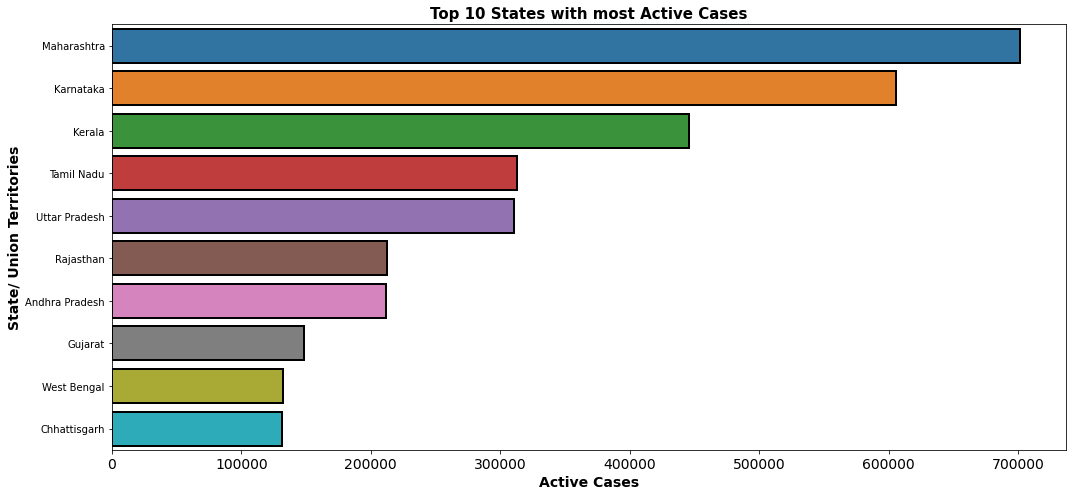

In [22]:
# Top 10 States with most active Covid Cases.

top_10_active_states = df_india[['State/UnionTerritory','Active']].groupby('State/UnionTerritory').agg('max').sort_values(by= 'Active', ascending= False)[:10].reset_index()


# Plotting 
plt.figure(figsize= (15,7))
plt.title('Top 10 States with most Active Cases', size = 15, fontweight = 'bold')
sns.barplot(data =top_10_active_states.iloc[:10], x = 'Active', y = 'State/UnionTerritory', 
            linewidth = 2,orient = 'h',
            edgecolor = 'black')
plt.ylabel('State/ Union Territories',size = 14, fontweight = 'bold')
plt.xlabel('Active Cases',size = 14, fontweight = 'bold')
plt.xticks( size = 14)
plt.tight_layout()
plt.show()


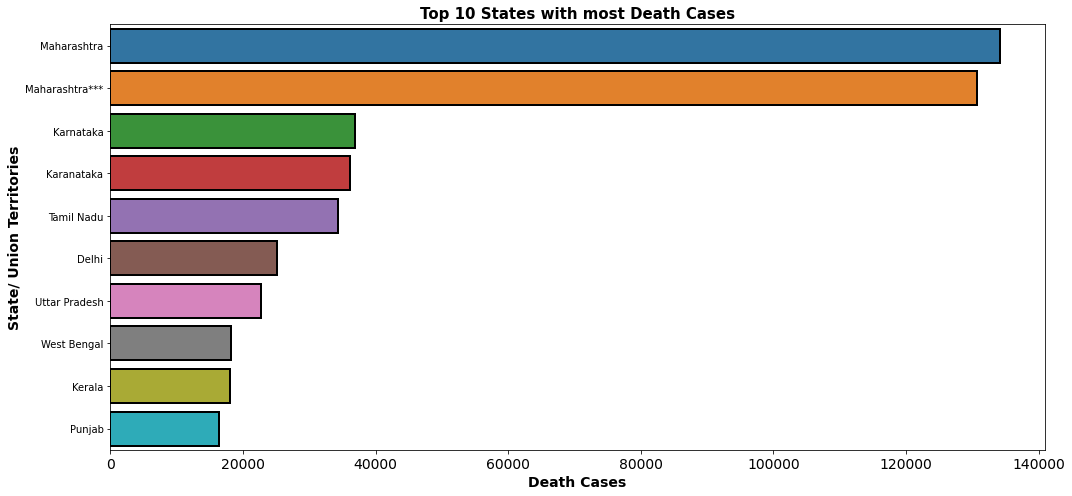

In [23]:
# TOP STATES WITH HIGHEST DEATHS :

top_10_states_deaths = df_india.groupby(by = 'State/UnionTerritory').max()[['Deaths', 'Date']].sort_values(by = ['Deaths'],ascending= False).reset_index() 

# Plotting 
plt.figure(figsize= (15,7))
plt.title('Top 10 States with most Death Cases', size = 15, fontweight = 'bold')
sns.barplot(data =top_10_states_deaths.iloc[:10], x = 'Deaths', y = 'State/UnionTerritory', 
            linewidth = 2, orient = 'h',
            edgecolor = 'black')
plt.ylabel('State/ Union Territories',size = 14, fontweight = 'bold')
plt.xlabel('Death Cases',size = 14, fontweight = 'bold')
plt.xticks( size = 14)
plt.tight_layout()
plt.show()

Text(0.5, 0, 'Time --- >')

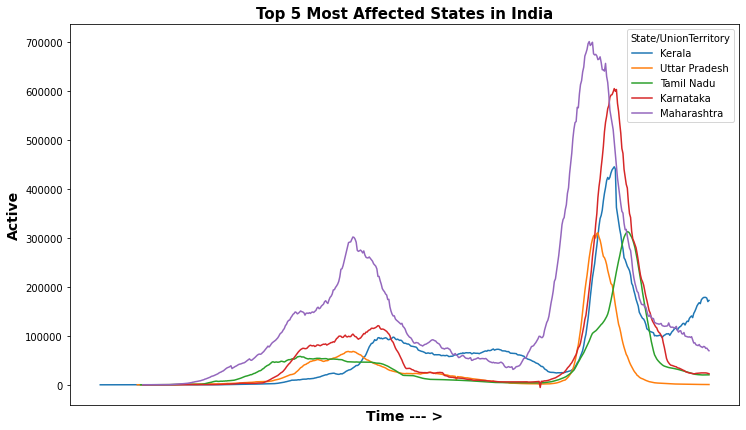

In [24]:
# COVID Growth Trend for Top 5 Most Affected States in India:

plt.figure(figsize= (12,7))

sns.lineplot(data= df_india[df_india['State/UnionTerritory'].isin(
    ['Maharashtra', 'Karnataka','Kerala','Tamil Nadu','Uttar Pradesh' ]
)], x = 'Date', y = 'Active', hue = 'State/UnionTerritory')

plt.title('Top 5 Most Affected States in India', size = 15, fontweight = 'bold')
plt.ylabel('Active', size = 14, fontweight = 'bold')
plt.xticks([])
plt.xlabel('Time --- >', size = 14, fontweight = 'bold')

### <b> DATASET : df_vaccine (info about statewise vaccination in INDIA)

In [30]:
df_vaccine.head()

,Updated On,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0


In [31]:
# COLUMNS WITH NUMBER OF NULL VALUES %.
df_vaccine.isnull().sum() / len(df_vaccine)

Updated On                             0.000000
State                                  0.000000
Total Doses Administered               0.028553
Sessions                               0.028553
 Sites                                 0.028553
First Dose Administered                0.028553
Second Dose Administered               0.028553
Male (Doses Administered)              0.048948
Female (Doses Administered)            0.048948
Transgender (Doses Administered)       0.048948
 Covaxin (Doses Administered)          0.028553
CoviShield (Doses Administered)        0.028553
Sputnik V (Doses Administered)         0.618228
AEFI                                   0.306820
18-44 Years (Doses Administered)       0.783047
45-60 Years (Doses Administered)       0.783047
60+ Years (Doses Administered)         0.783047
18-44 Years(Individuals Vaccinated)    0.524156
45-60 Years(Individuals Vaccinated)    0.524028
60+ Years(Individuals Vaccinated)      0.524028
Male(Individuals Vaccinated)           0

In [32]:
# DROPING COLUMNS/FEATURES FROM THE DATASET.
df_vaccine = df_vaccine.drop(['Sputnik V (Doses Administered)',
 'AEFI',
 '18-44 Years (Doses Administered)',
 '45-60 Years (Doses Administered)',
 '60+ Years (Doses Administered)',
 '18-44 Years(Individuals Vaccinated)',
 '45-60 Years(Individuals Vaccinated)',
 '60+ Years(Individuals Vaccinated)'], axis= 1)

df_vaccine.head()

,Updated On,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),Covaxin (Doses Administered),CoviShield (Doses Administered),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,579.0,47697.0,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,635.0,57969.0,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,1299.0,98150.0,41361.0,58083.0,5.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,3017.0,192508.0,81901.0,113613.0,11.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,3946.0,247334.0,98111.0,153145.0,24.0,251280.0



> Male Individuals      :7138698858.0
> Female Individuals    :6321628736.0



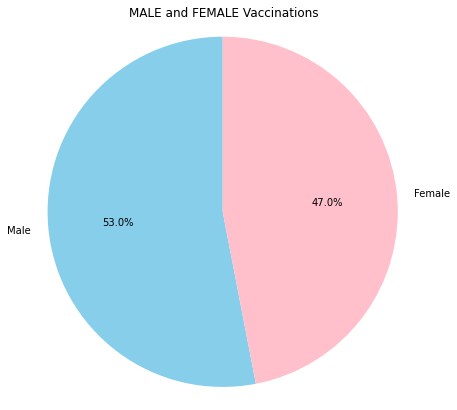

In [36]:
# MALE vs FEMALE VACCINATION: 

male_individuals = df_vaccine['Male(Individuals Vaccinated)'].sum()
female_individuals = df_vaccine['Female(Individuals Vaccinated)'].sum()

print(f'''
> Male Individuals      :{male_individuals}
> Female Individuals    :{female_individuals}
''')

# plotting :
labels = ['Male', 'Female']
sizes = [male_individuals, female_individuals]
colors = ['skyblue', 'pink']

plt.figure(figsize=(7,7))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%',startangle=90)
plt.title("MALE and FEMALE Vaccinations")
plt.axis('equal')
plt.show()


In [13]:
# UPDATE THE DATAFRAME BY REMOVING ROWS HAVING 'STATE' AS 'INDIA' 

df_vaccine = df_vaccine[df_vaccine['State'] != 'India']

In [14]:
df_vaccine.head()

,Updated On,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),Covaxin (Doses Administered),CoviShield (Doses Administered),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
212,16/01/2021,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,0.0,23.0,NaN,NaN,NaN,23.0
213,17/01/2021,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,0.0,23.0,NaN,NaN,NaN,23.0
214,18/01/2021,Andaman and Nicobar Islands,42.0,9.0,2.0,42.0,0.0,29.0,13.0,0.0,0.0,42.0,NaN,NaN,NaN,42.0
215,19/01/2021,Andaman and Nicobar Islands,89.0,12.0,2.0,89.0,0.0,53.0,36.0,0.0,0.0,89.0,NaN,NaN,NaN,89.0
216,20/01/2021,Andaman and Nicobar Islands,124.0,16.0,3.0,124.0,0.0,67.0,57.0,0.0,0.0,124.0,NaN,NaN,NaN,124.0


In [15]:
df_vaccine.rename(columns= {'Total Individuals Vaccinated' : 'total'}, inplace = True)
df_vaccine.head(3)

,Updated On,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),Covaxin (Doses Administered),CoviShield (Doses Administered),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),total
212,16/01/2021,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,0.0,23.0,NaN,NaN,NaN,23.0
213,17/01/2021,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,0.0,23.0,NaN,NaN,NaN,23.0
214,18/01/2021,Andaman and Nicobar Islands,42.0,9.0,2.0,42.0,0.0,29.0,13.0,0.0,0.0,42.0,NaN,NaN,NaN,42.0


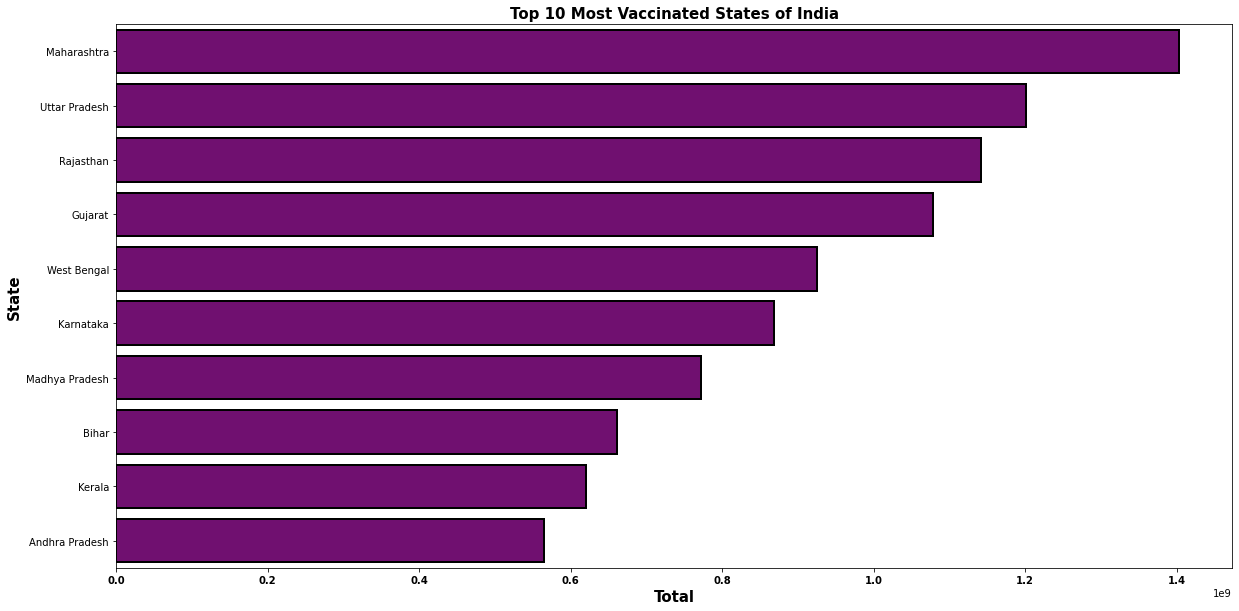

In [16]:
# STATES WITH MOST NUMBER OF VACCINATED INDIVIDUALS 

top_10_most_vaccinated = df_vaccine.groupby('State')['total'].sum().to_frame('total').sort_values('total', ascending = False).reset_index()[:10]

# plotting :
plt.figure(figsize = (20,10))
ax = sns.barplot(data = top_10_most_vaccinated.iloc[:10], x =top_10_most_vaccinated.total, y = top_10_most_vaccinated.State, 
                linewidth = 2, orient = 'h',
                edgecolor = 'black', color = 'purple')
plt.title('Top 10 Most Vaccinated States of India', size = 15, fontweight = 'bold')
plt.xlabel('Total', size = 15, fontweight = 'bold')
plt.ylabel('State', size = 15, fontweight = 'bold')
plt.xticks(fontweight = 'bold')

plt.show()

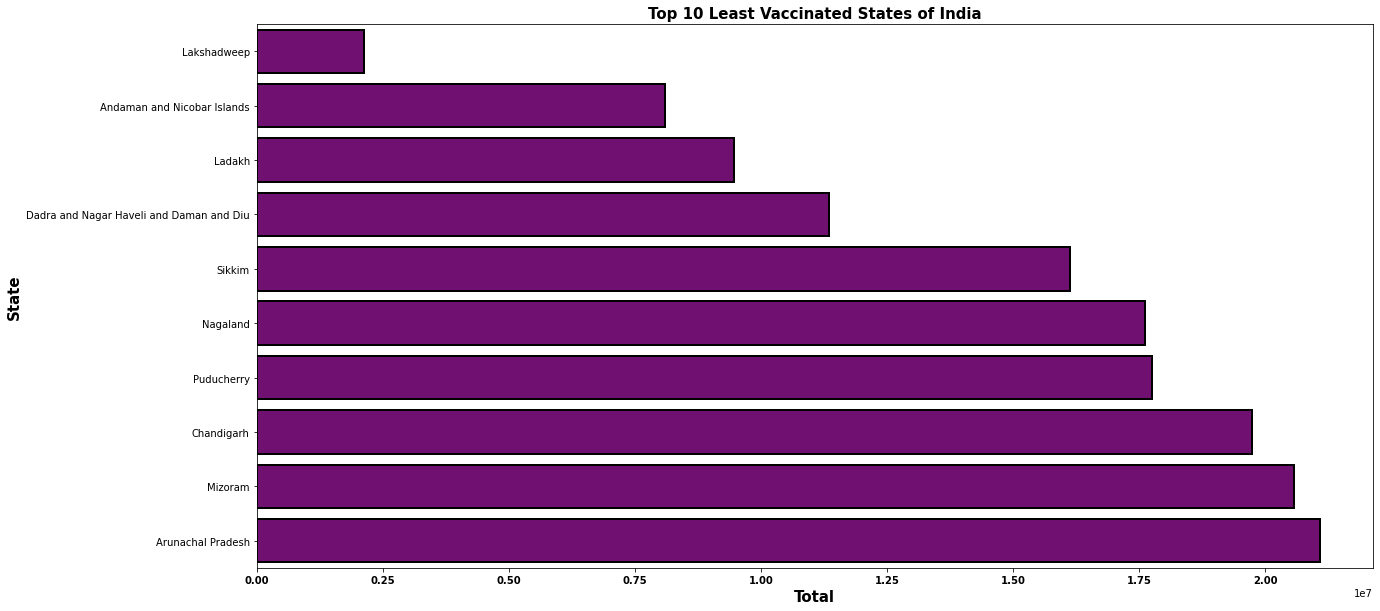

In [17]:
# STATES WITH LEAST NUMBER OF VACCINATED INDIVIDUALS 

top_10_most_vaccinated = df_vaccine.groupby('State')['total'].sum().to_frame('total').sort_values('total', ascending = True).reset_index()[:10]

# plotting :
plt.figure(figsize = (20,10))
ax = sns.barplot(data = top_10_most_vaccinated.iloc[:10], x =top_10_most_vaccinated.total,y = top_10_most_vaccinated.State, 
                linewidth = 2, orient = 'h',
                edgecolor = 'black', color = 'purple')
plt.title('Top 10 Least Vaccinated States of India', size = 15, fontweight = 'bold')
plt.xlabel('Total', size = 15, fontweight = 'bold')
plt.ylabel('State', size = 15, fontweight = 'bold')
plt.xticks(fontweight = 'bold')

plt.show()


__________________________________